In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
from mne.decoding import UnsupervisedSpatialFilter
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict
from scipy.stats import skew, kurtosis
import mne 

from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from sklearn.metrics import confusion_matrix
from mne.viz import tight_layout

import time
import pandas as pd

In [2]:
%run Batch_ArtifactFilter_Epoch.ipynb

In [3]:
epoch=remove_artifacts_and_create_epochs('C:\\USB Drive\\NewEEG-200s\\SA20140206\\20140206_1151.set')

Reading C:\USB Drive\NewEEG-200s\SA20140206\20140206_1151.fdt
Reading 0 ... 831247  =      0.000 ...  1623.529 secs...
5977 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
time difference 1.80859375
[509034      0      4]
[509960      0    130]

 **1 bad trials dropped**
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 samples (1.650 sec) selected
5977 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   24.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   38.4s finished


5584 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 100.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
1979 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1979 events and 500 original time points ...
1011 bad epochs dropped


In [4]:
def getave(data,i,j):
    dataof100=[]
    for channel in data[j]:
        dataof100.append(channel[i:i+50])

    arrayofdata100=np.array(dataof100)
    print(arrayofdata100.shape)
    sum1=[]
    for channel in arrayofdata100:
        sum1.append(np.sum(channel))
    sum1=np.array(sum1)
    mean1=np.mean(sum1)
    mean2=np.sum(sum1)/129
    var1=sum1-mean1
    print("variance",var1)
    average1=np.mean(var1)
    print("average varaince for segment " ,i ,"to ", i+49 , "is: " ,average1)
#     df=pd.DataFrame(var1)
#     print(df)
#     df.columns=['variance']
#     index = np.arange(125)
#     df.plot.bar(x=index,y='variance')
    
    index = np.arange(125)
    plt.bar(index, var1)
    plt.xlabel('Genre', fontsize=5)
    plt.ylabel('No of Movies', fontsize=5)
    plt.xticks(index, var1, fontsize=5, rotation=30)
    plt.title('average 10 points')
    plt.show()

In [5]:
newdata=epoch.get_data()


In [6]:
getave(newdata,51,3)

(129, 50)
variance [ 2.12287393e-04  3.64699253e-04  2.80675734e-04  2.53995066e-04
  2.41730910e-04  1.71111654e-03  1.32355105e-05  1.65606943e-04
  3.05097570e-05  4.04961264e-05 -5.62148913e-05  3.95538441e-05
 -1.68161575e-04  1.43652611e-04 -4.14924772e-05 -2.06830237e-04
  2.29786321e-04  5.08482140e-05 -7.89285655e-05 -2.71612035e-04
 -2.00663388e-04  2.33260297e-04 -4.54868458e-05 -1.36579691e-04
 -2.93883497e-04  9.13240593e-05 -1.15572570e-04 -1.27480941e-04
 -2.48158002e-04 -2.90269543e-04 -1.44320767e-04  1.52013803e-05
 -1.87885029e-04 -2.95845659e-04 -9.89420817e-06 -1.01875510e-04
 -1.20795868e-04 -4.64461281e-05 -3.01510617e-05 -2.72625813e-04
  1.36534774e-05  8.25997206e-05 -4.37125949e-05  5.16773740e-05
  2.96590063e-04  1.64140546e-04 -1.14725106e-05  1.50836598e-04
  8.33906767e-05  2.14072703e-04  1.51083905e-04  4.82591128e-05
  2.53223620e-04 -2.36369215e-05 -1.02955987e-04  7.87552878e-05
  8.52299237e-05 -7.59825209e-05 -1.81179079e-04 -1.04551096e-04
 -1.34

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [11]:
newdata.shape

(949, 129, 500)

In [30]:
getave(newdata,101,3)

(125, 50)
variance [ 3.41725651e-04  2.87898934e-04  3.29014632e-04  2.18907107e-04
  1.76702295e-03 -1.42867980e-05  2.34472890e-04  1.87228322e-06
  8.37113303e-05 -6.35906478e-05  5.54117092e-05 -1.65323744e-04
  8.27986462e-05 -2.94074635e-05 -1.60243574e-04  3.01863037e-04
 -1.25020527e-05 -1.12298332e-04 -2.43720846e-04 -1.40197618e-04
  1.79277321e-04 -9.37753010e-05 -1.37754153e-04 -2.59732981e-04
  1.45183004e-04 -1.44719344e-04 -1.52352256e-04 -2.40436537e-04
 -2.40276994e-04 -2.05023968e-04 -3.03087048e-05 -1.69556738e-04
 -2.68342552e-04  2.06945223e-05 -1.03121325e-04 -1.08795145e-04
 -7.28435765e-05 -3.01247690e-05 -3.14799621e-04  2.12571198e-05
  7.93070220e-05 -4.88220939e-05  5.35370096e-05  1.57777613e-04
  1.65028937e-04  5.85962838e-05  1.82081851e-04  1.36071136e-04
  5.72206898e-05  2.64745845e-04 -3.06349437e-05 -1.10229913e-04
  5.25972765e-05  8.24516841e-05 -5.94991639e-05 -1.90651529e-04
 -1.01168585e-04 -1.13364735e-04 -1.28450943e-04 -1.20518850e-04
 -1.47

In [32]:
epoch.drop_channels(['Lm','Rm','VEOG'])

<Epochs  |   968 events (all good), 0 - 1.94922 sec, baseline [None, 0], ~461.9 MB, data loaded,
 'b-f1-pic': 0
 'b-f1-snd': 0
 'b-f1-spk': 425
 'b-f1-wrd': 0
 'b-f2-pic': 0
 'b-f2-snd': 0
 'b-f2-spk': 543
 'b-f2-wrd': 0
 'b-tg-pic': 0
 'b-tg-snd': 0
 'b-tg-spk': 0
 'b-tg-wrd': 0
 'f-f1-pic': 0
 'f-f1-snd': 0
 'f-f1-spk': 0
 'f-f1-wrd': 0
 'f-f2-pic': 0
 'f-f2-snd': 0
 'f-f2-spk': 0
 'f-f2-wrd': 0
 'f-tg-pic': 0
 'f-tg-snd': 0
 'f-tg-spk': 0
 'f-tg-wrd': 0>

In [21]:
newdata=epoch.get_data()
newdata.shape

(949, 126, 500)

In [31]:
epoch.drop_channels(['STI 014'])

<Epochs  |   968 events (all good), 0 - 1.94922 sec, baseline [None, 0], ~473.0 MB, data loaded,
 'b-f1-pic': 0
 'b-f1-snd': 0
 'b-f1-spk': 425
 'b-f1-wrd': 0
 'b-f2-pic': 0
 'b-f2-snd': 0
 'b-f2-spk': 543
 'b-f2-wrd': 0
 'b-tg-pic': 0
 'b-tg-snd': 0
 'b-tg-spk': 0
 'b-tg-wrd': 0
 'f-f1-pic': 0
 'f-f1-snd': 0
 'f-f1-spk': 0
 'f-f1-wrd': 0
 'f-f2-pic': 0
 'f-f2-snd': 0
 'f-f2-spk': 0
 'f-f2-wrd': 0
 'f-tg-pic': 0
 'f-tg-snd': 0
 'f-tg-spk': 0
 'f-tg-wrd': 0>

In [36]:
getave(newdata,451,3)

(125, 49)
variance [ 3.83089980e-04  3.08185619e-04  3.08462715e-04  2.65152843e-04
  1.68594037e-03  2.99244704e-05  1.93528302e-04  4.43788422e-05
  5.14459171e-05 -6.20996845e-05  2.52583949e-05 -8.87260824e-05
  1.25850326e-04 -7.01201841e-05 -1.97936952e-04  2.80703018e-04
  6.30585020e-05 -1.23382537e-04 -2.78245574e-04 -1.60625216e-04
  2.35940226e-04 -6.67358466e-05 -1.65954496e-04 -2.86995346e-04
  1.35698563e-04 -1.11113832e-04 -1.64791275e-04 -2.59997366e-04
 -2.45148657e-04 -1.33354111e-04 -2.04502095e-05 -2.07802853e-04
 -2.99381896e-04  2.17276988e-05 -1.25416879e-04 -1.16556910e-04
 -7.10954562e-05 -4.11633662e-05 -2.81631694e-04  1.20718354e-05
  9.42875919e-05 -3.10989775e-05  6.79269507e-05  1.81718576e-04
  1.83795064e-04  1.00187913e-04  1.98124257e-04  1.47767414e-04
  6.86424404e-05  2.79526772e-04 -5.60441417e-06 -1.05402606e-04
  4.93879992e-05  8.97485852e-05 -6.35388890e-05 -1.97827502e-04
 -1.19592474e-04 -1.36068126e-04 -1.46551939e-04 -1.33382632e-04
 -1.80

In [65]:
def classify_test_KNN(X,y):

    clf = make_pipeline(Vectorizer(),
                         KNN(n_neighbors=11))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score

In [75]:
def get_samples_targets(epochs):
    X = epochs.get_data()
    y = epochs.events[:,-1]
    return X, y

In [72]:
X,y=get_samples_targets(epoch,101)
print(X.shape)
classify_test_KNN(X,y)

(968, 125, 50)


0.5120274914089347

In [67]:
X,y=get_samples_targets(epoch,151)
classify_test_KNN(X,y)

0.5326460481099656

In [71]:
X,y=get_samples_targets(epoch,301)
classify_test_KNN(X,y)

0.5429553264604811

In [76]:
X,y=get_samples_targets(epoch)
classify_test_KNN(X,y)

0.5773195876288659

In [19]:
X,y=get_samples_targets(epoch)
classify_test_KNN(X,y)

0.06872852233676977

In [10]:
X,y=get_samples_targets(epoch)
classify_test_KNN(X,y)

0.06666666666666667

In [52]:
X,y=get_samples_targets(epoch)
classify_test_KNN(X,y)

0.0912280701754386

In [20]:
def filter_event_id(epoch):
    epochs=[[]]
    j=0
    for i in range(len(epoch.events[:,-1])):
        if i % 3 ==0:
            epochs.append([])
            j=j+1
            epochs[j].append(epoch.events[i,-1])
        else:
            epochs[j].append(epoch.events[i,-1])
    for events in epochs:
        if  4 in events or 1 in events or 13 in events or 16 in events:
            for i in range(len(events)):
                    events[i]=4
        else:
            for i in range(len(events)):
                    events[i]=5
    epochs.pop(0)
    flattened_list = [y for x in epochs for y in x]
    for i in range(len(epoch.events)):
        epoch.events[i]=flattened_list[i]
    return epoch

In [21]:
epoch=filter_event_id(epoch)

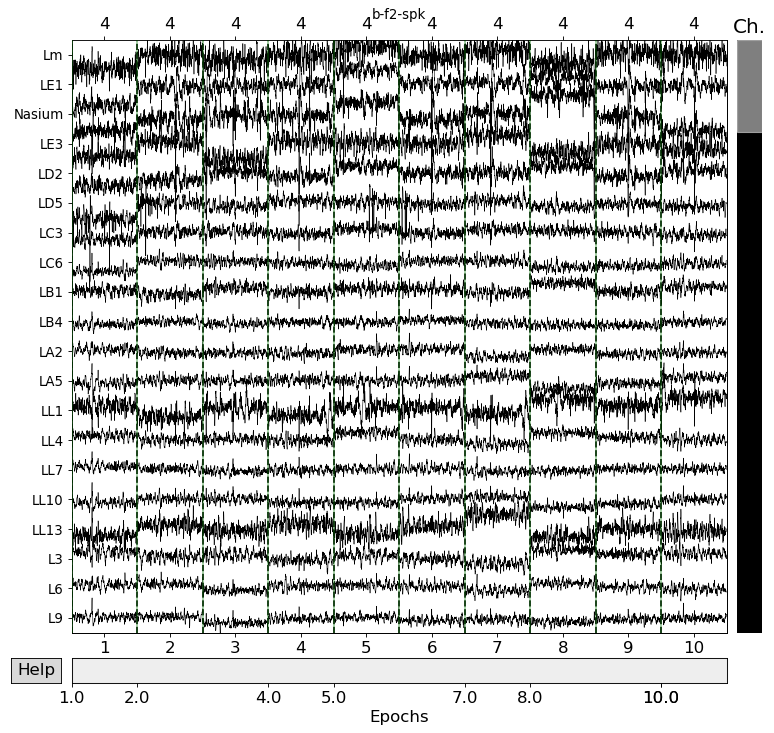

In [22]:
epoch[0:10].plot()

In [45]:
def classify_test_log(X,y):

    clf = make_pipeline(Vectorizer(),
                         LogisticRegression())
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score

In [61]:
X,y=get_samples_targets(epoch,101)
X.shape

(968, 125, 50)

In [62]:
X,y=get_samples_targets(epoch,101)
classify_test_log(X,y)

0.5326460481099656

In [63]:
X,y=get_samples_targets(epoch,121)
classify_test_log(X,y)

0.5326460481099656

In [77]:
X,y=get_samples_targets(epoch)
X.shape
classify_test_log(X,y)

0.5326460481099656

In [4]:
def getave(data,i,j):
    dataof50=[]
    for channel in newdata[j]:
        dataof50.append(channel[i:i+49])

    arrayofdata50=np.array(dataof50)
    print(arrayofdata50.shape)
    sum1=[]
    for channel in arrayofdata50:
        sum1.append(np.sum(channel))
    sum1=np.array(sum1)
    print("shape of channel sum : Xi", sum1.shape , sum1[0:3])
    mean1=np.sum(sum1)/125
    print("mean of 125 channel: X",mean1)
    Dev=sum1-mean1
    print("Xi-X",Dev.shape,Dev[0:3])
    SquareofDev=Dev*Dev
    print("(Xi-X)^2",SquareofDev.shape,SquareofDev[0:3])
    ##print("variance",var1)
    sumofdev=np.sum(SquareofDev)
    print("sum of (Xi-X)^2",sumofdev)
    var=sumofdev/125
    print("variance",var)
     
#     index = np.arange(125)
#     plt.bar(index, SquareofDev)
#     plt.xlabel('Genre', fontsize=5)
#     plt.ylabel('No of Movies', fontsize=5)
#     plt.xticks(index, SquareofDev, fontsize=5, rotation=30)
#     plt.title('Square of data from average')
#     plt.show()


In [5]:
newdata=epoch.get_data()
newdata[1].shape

(129, 500)

In [109]:
print(getave(newdata,0,1))
print(getave(newdata,51,1))
print(getave(newdata,101,1))
print(getave(newdata,151,1))
print(getave(newdata,201,1))
print(getave(newdata,251,1))
print(getave(newdata,301,1))
print(getave(newdata,351,1))
print(getave(newdata,401,1))
print(getave(newdata,451,1))


(125, 49)
shape of channel sum : Xi (125,) [-1.28808690e-04 -2.75106904e-04  6.99726914e-05]
mean of 125 channel: X 2.855609269869449e-06
Xi-X (125,) [-1.31664299e-04 -2.77962513e-04  6.71170822e-05]
(Xi-X)^2 (125,) [1.73354876e-08 7.72631587e-08 4.50470272e-09]
sum of (Xi-X)^2 2.486929602719284e-06
variance 1.9895436821754272e-08
None
(125, 49)
shape of channel sum : Xi (125,) [-9.34821852e-05 -2.23752782e-04  6.83307398e-05]
mean of 125 channel: X 2.7597778129466006e-06
Xi-X (125,) [-9.6241963e-05 -2.2651256e-04  6.5570962e-05]
(Xi-X)^2 (125,) [9.26251544e-09 5.13079398e-08 4.29955106e-09]
sum of (Xi-X)^2 2.309268074284598e-06
variance 1.8474144594276784e-08
None
(125, 49)
shape of channel sum : Xi (125,) [-1.16570318e-04 -2.87409788e-04  8.28315761e-05]
mean of 125 channel: X 2.67449958379794e-06
Xi-X (125,) [-1.19244818e-04 -2.90084287e-04  8.01570765e-05]
(Xi-X)^2 (125,) [1.42193265e-08 8.41488936e-08 6.42515691e-09]
sum of (Xi-X)^2 2.508834883746048e-06
variance 2.007067906996838

In [111]:
print(getave(newdata,0,1))

(125, 49)
shape of channel sum : Xi (125,) [-1.28808690e-04 -2.75106904e-04  6.99726914e-05]
mean of 125 channel: X 2.855609269869449e-06
Xi-X (125,) [-1.31664299e-04 -2.77962513e-04  6.71170822e-05]
(Xi-X)^2 (125,) [1.73354876e-08 7.72631587e-08 4.50470272e-09]
sum of (Xi-X)^2 2.486929602719284e-06
variance 1.9895436821754272e-08
None


In [112]:
print(getave(newdata,50,1))

(125, 49)
shape of channel sum : Xi (125,) [-9.02013586e-05 -2.25952738e-04  6.20728406e-05]
mean of 125 channel: X 2.7773135258763194e-06
Xi-X (125,) [-9.29786722e-05 -2.28730051e-04  5.92955271e-05]
(Xi-X)^2 (125,) [8.64503348e-09 5.23174364e-08 3.51595953e-09]
sum of (Xi-X)^2 2.304222906878327e-06
variance 1.8433783255026617e-08
None


In [114]:
print(getave(newdata,0,0))
print(getave(newdata,51,0))
print(getave(newdata,101,0))
print(getave(newdata,151,0))
print(getave(newdata,201,0))
print(getave(newdata,251,0))
print(getave(newdata,301,0))
print(getave(newdata,351,0))
print(getave(newdata,401,0))
print(getave(newdata,451,0))

(125, 49)
shape of channel sum : Xi (125,) [-0.00089827 -0.00072786 -0.00053696]
mean of 125 channel: X 2.0455202732151335e-05
Xi-X (125,) [-0.00091872 -0.00074832 -0.00055741]
(Xi-X)^2 (125,) [8.44046877e-07 5.59982151e-07 3.10711244e-07]
sum of (Xi-X)^2 1.0128107447940495e-05
variance 8.102485958352397e-08
None
(125, 49)
shape of channel sum : Xi (125,) [-0.00085469 -0.00069597 -0.00051053]
mean of 125 channel: X 1.9545172886074214e-05
Xi-X (125,) [-0.00087423 -0.00071552 -0.00053008]
(Xi-X)^2 (125,) [7.64278568e-07 5.11964312e-07 2.80981728e-07]
sum of (Xi-X)^2 9.835807326511578e-06
variance 7.868645861209262e-08
None
(125, 49)
shape of channel sum : Xi (125,) [-0.00092411 -0.00069588 -0.00057108]
mean of 125 channel: X 2.0708815029685183e-05
Xi-X (125,) [-0.00094482 -0.00071659 -0.00059179]
(Xi-X)^2 (125,) [8.92688529e-07 5.13499270e-07 3.50209884e-07]
sum of (Xi-X)^2 1.1469677561547086e-05
variance 9.175742049237669e-08
None
(125, 49)
shape of channel sum : Xi (125,) [-0.00087574 

In [115]:
print(getave(newdata,0,3))
print(getave(newdata,51,3))
print(getave(newdata,101,3))
print(getave(newdata,151,3))
print(getave(newdata,201,3))
print(getave(newdata,251,3))
print(getave(newdata,301,3))
print(getave(newdata,351,3))
print(getave(newdata,401,3))
print(getave(newdata,451,3))

(125, 49)
shape of channel sum : Xi (125,) [ 1.43494000e-05 -1.82468236e-05  1.38487892e-04]
mean of 125 channel: X -3.2241277995100946e-06
Xi-X (125,) [ 1.75735278e-05 -1.50226958e-05  1.41712019e-04]
(Xi-X)^2 (125,) [3.08828880e-10 2.25681388e-10 2.00822964e-08]
sum of (Xi-X)^2 2.426545361042112e-06
variance 1.9412362888336896e-08
None
(125, 49)
shape of channel sum : Xi (125,) [-3.23492684e-05 -8.51690431e-05  7.33497062e-05]
mean of 125 channel: X -1.5976704813526593e-06
Xi-X (125,) [-3.07515979e-05 -8.35713726e-05  7.49473767e-05]
(Xi-X)^2 (125,) [9.45660773e-10 6.98417432e-09 5.61710927e-09]
sum of (Xi-X)^2 2.4556513886997956e-06
variance 1.9645211109598367e-08
None
(125, 49)
shape of channel sum : Xi (125,) [-1.72118264e-05 -7.71942689e-05  1.52956829e-04]
mean of 125 channel: X -1.895136421952953e-06
Xi-X (125,) [-1.53166900e-05 -7.52991325e-05  1.54851966e-04]
(Xi-X)^2 (125,) [2.34600993e-10 5.66995935e-09 2.39791313e-08]
sum of (Xi-X)^2 2.4182464179610374e-06
variance 1.93459

In [116]:
print(getave(newdata,0,4))
print(getave(newdata,51,4))
print(getave(newdata,101,4))
print(getave(newdata,151,4))
print(getave(newdata,201,4))
print(getave(newdata,251,4))
print(getave(newdata,301,4))
print(getave(newdata,351,4))
print(getave(newdata,401,4))
print(getave(newdata,451,4))

(125, 49)
shape of channel sum : Xi (125,) [0.00070627 0.00058933 0.00011178]
mean of 125 channel: X -1.611835872845593e-05
Xi-X (125,) [0.00072239 0.00060545 0.0001279 ]
(Xi-X)^2 (125,) [5.21842426e-07 3.66568984e-07 1.63589399e-08]
sum of (Xi-X)^2 4.312637390693761e-06
variance 3.450109912555009e-08
None
(125, 49)
shape of channel sum : Xi (125,) [6.35198357e-04 4.98592975e-04 5.93103518e-05]
mean of 125 channel: X -1.3740162217674693e-05
Xi-X (125,) [6.48938520e-04 5.12333138e-04 7.30505140e-05]
(Xi-X)^2 (125,) [4.21121202e-07 2.62485244e-07 5.33637759e-09]
sum of (Xi-X)^2 3.947334559067744e-06
variance 3.157867647254195e-08
None
(125, 49)
shape of channel sum : Xi (125,) [6.13655970e-04 4.64484261e-04 6.64365086e-05]
mean of 125 channel: X -1.3230990699945498e-05
Xi-X (125,) [6.26886961e-04 4.77715252e-04 7.96674993e-05]
(Xi-X)^2 (125,) [3.92987261e-07 2.28211862e-07 6.34691044e-09]
sum of (Xi-X)^2 3.762360949072874e-06
variance 3.009888759258299e-08
None
(125, 49)
shape of channel

In [117]:
epoch.ch_names

['LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'RE3',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 'LE4']

In [6]:
print(getave(newdata,0,1))
print(getave(newdata,51,1))
print(getave(newdata,101,1))
print(getave(newdata,151,1))
print(getave(newdata,201,1))
print(getave(newdata,251,1))
print(getave(newdata,301,1))
print(getave(newdata,351,1))
print(getave(newdata,401,1))
print(getave(newdata,451,1))

(129, 49)
shape of channel sum : Xi (129,) [-3.45106261e-05 -1.28808690e-04 -2.75106904e-04]
mean of 125 channel: X 6.697989982335818e-08
Xi-X (129,) [-3.45776060e-05 -1.28875670e-04 -2.75173884e-04]
(Xi-X)^2 (129,) [1.19561084e-09 1.66089382e-08 7.57206663e-08]
sum of (Xi-X)^2 2.5387540860600528e-06
variance 2.031003268848042e-08
None
(129, 49)
shape of channel sum : Xi (129,) [-1.83508700e-05 -9.34821852e-05 -2.23752782e-04]
mean of 125 channel: X 0.04800006335105775
Xi-X (129,) [-0.04801841 -0.04809355 -0.04822382]
(Xi-X)^2 (129,) [0.00230577 0.00231299 0.00232554]
sum of (Xi-X)^2 35.7212176269691
variance 0.2857697410157528
None
(129, 49)
shape of channel sum : Xi (129,) [-8.63736432e-06 -1.16570318e-04 -2.87409788e-04]
mean of 125 channel: X 7.298522894040594e-08
Xi-X (129,) [-8.71034955e-06 -1.16643303e-04 -2.87482773e-04]
(Xi-X)^2 (129,) [7.58701892e-11 1.36056602e-08 8.26463446e-08]
sum of (Xi-X)^2 2.559914088061249e-06
variance 2.0479312704489992e-08
None
(129, 49)
shape of ch

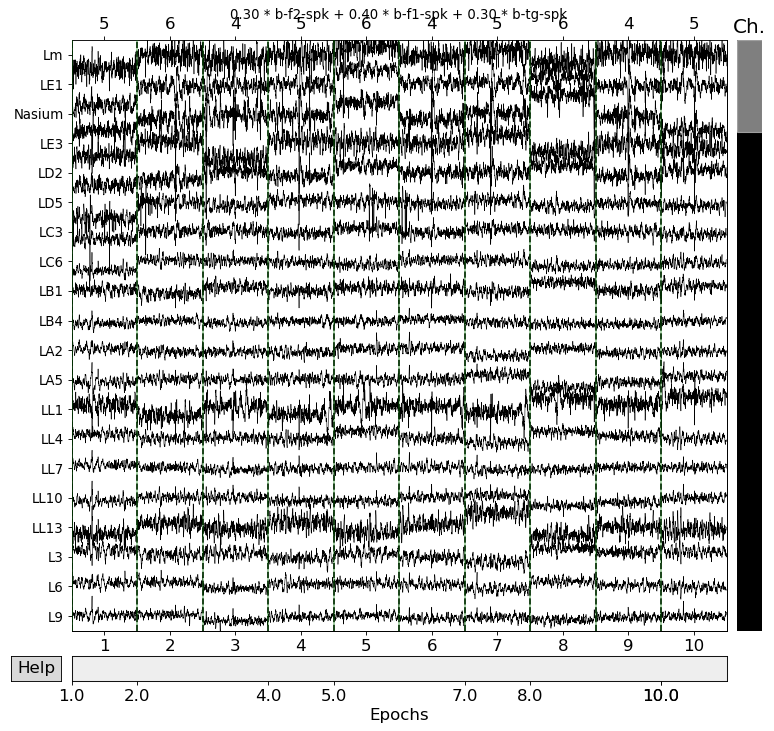

In [14]:
epoch[0:10].plot()

In [15]:
epoch.ch_names

['Lm',
 'LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'VEOG',
 'RE3',
 'Rm',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 